# Grape V1 Single Station Time Series
The purpose of this notebook is to provide a one-stop shop for plotting data from the prototype of the Grape 1 Low-Cost Personal Space Weather Station. 

This notebook was created by Kristina Collins KD8OXT. Code was contributed by Aidan Montare KB3UMD, Bob Benedict KD8CGH, and Nathaniel Frissell W2NAF. Hardware designed by John Gibbons. Node maintainers are listed in the `nodelist.csv` file which accompanies this notebook.

## Instructions:
Data is permanently stored at [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.6622112.svg)](https://doi.org/10.5281/zenodo.6622112). To use this notebook, download the data from the repository and unzip it into the `data/` directory.

In [1]:
import datetime
import pytz

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

from hamsci_psws import geopack,grape1

In [2]:
mpl.rcParams['font.size']        = 16
mpl.rcParams['font.weight']      = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.grid']        = True
mpl.rcParams['grid.linestyle']   = ':'
mpl.rcParams['figure.figsize']   = np.array([15, 8])
mpl.rcParams['axes.xmargin']     = 0

# Generate Data Overview
The first step is to pull the list of filenames from the server maintained by the WWV Amateur Radio Club, WW0WWV. We will then generate a pandas dataframe from the filename list using the split() function. This will tell us the earliest and latest dates of data collection; we can use these as the bounds of our analysis, or substitute in a smaller set of bounds. We'll use this to create a Data Inventory (Gantt chart) showing station availability, and maybe keograms of our data over time. While we're at it, we can also generate two versions of a station map: one static, to put in our paper; and one dynamic, showing which stations were active at a given point in time. 

## Data Inventory

In [3]:
inventory = grape1.DataInventory()

In [4]:
inventory.df

Datetime  Node   G Grid Square   Frequency                                           Filename
159  2019-05-24 00:00:00+00:00     1  G1      EN91fh   5000000.0  2019-05-24T000000Z_N0000001_G1_EN91fh_FRQ_WWV5...
1762 2019-05-25 00:00:00+00:00     1  G1      EN91fh   5000000.0  2019-05-25T000000Z_N0000001_G1_EN91fh_FRQ_WWV5...
1332 2019-05-26 00:00:00+00:00     1  G1      EN91fh   5000000.0  2019-05-26T000000Z_N0000001_G1_EN91fh_FRQ_WWV5...
3169 2019-05-27 00:00:00+00:00     1  G1      EN91fh   5000000.0  2019-05-27T000000Z_N0000001_G1_EN91fh_FRQ_WWV5...
5304 2019-05-28 00:00:00+00:00     1  G1      EN91fh   5000000.0  2019-05-28T000000Z_N0000001_G1_EN91fh_FRQ_WWV5...
...                        ...   ...  ..         ...         ...                                                ...
7065 2022-05-31 00:00:00+00:00    39  G1      EM73ut  10000000.0  2022-05-31T000000Z_N0000039_G1_EM73ut_FRQ_WWV1...
5699 2022-05-31 00:00:00+00:00    24  G1      JO33kg  14670000.0  2022-05-31T000000Z_N0000024_G1_JO33kg_FRQ_CHU1...
2071 2022-05-31 00:00:00+00:00    35  C1      JO33lg  15000000.0  2022-05-31T000000Z_N0000035_C1_JO33lg_FRQ_WWV1...
7419 2022-05-31 00:00:01+00:00    29  G1      DM45dc  10000000.0  2022-05-31T000001Z_N0000029_G1_DM45dc_FRQ_WWV1...
4512 2022-05-31 00:00:01+00:00    38  G1      EN71ia  10000000.0  2022-05-31T000001Z_N0000038_G1_EN71ia_FRQ_WWV1...

[8542 rows x 6 columns]

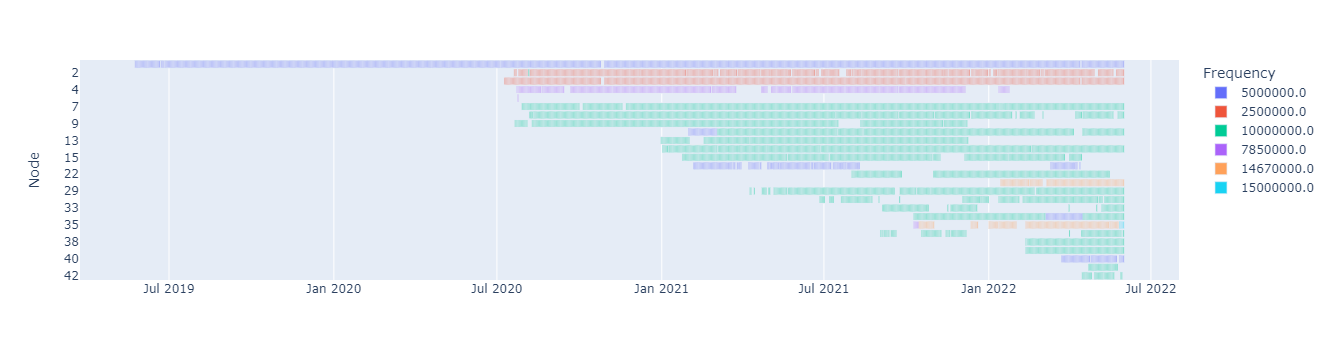

In [5]:
inventory.plot_inventory()

## Registered Nodes

In [6]:
nodes = grape1.GrapeNodes(logged_nodes=inventory.logged_nodes)

In [7]:
nodes.status_table()

In [8]:
nodes.plot_map()

## Load Grape Data - Individual Station

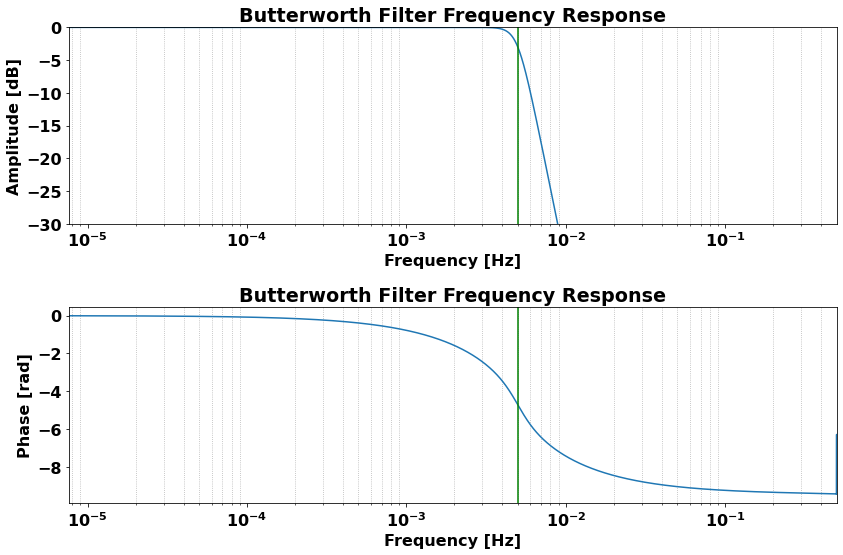

In [9]:
# kws  = dict(N=2,Tc_min = (15, 60),btype='bandpass',fs=1.)
filt = grape1.Filter()
filt.plotResponse()

In [10]:
node   = 1
sTime  = datetime.datetime(2019,10,1, tzinfo=pytz.UTC)
eTime  = sTime + datetime.timedelta(days=1)
freq   = 5e6 # MHz
gd = grape1.Grape1Data(node,freq,sTime,eTime,inventory=inventory,grape_nodes=nodes)

Loading Raw Data:   0%|                                                                                       …

In [11]:
gd.process_data()

Processing data using "standard" profile...

Computing Solar Local Time on raw data...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:00.970835
Resampling data with 1.0 second cadence...
  Resampling Time: 0:00:00.026483
Computing Solar Local Time on resampled...


  0%|                                                                                                         …

  Solar Time Computation Time: 0:00:00.983025
dB Conversion
  dB Conversion Time: 0:00:00.002212
Filtering data with 3.3333 minute low-pass Butterworth filter...
  Filtering Time: 0:00:00.006231

Total Processing Time: 0:00:01.989248


In [12]:
gd.show_datasets()

label
raw                                                 Raw Data
resampled                        Resampled Data (dt = 1.0 s)
filtered   Butterworth Filtered Data\n(N=6, Tc=3.3333 min...

{'fig': <Figure size 1080x864 with 2 Axes>}

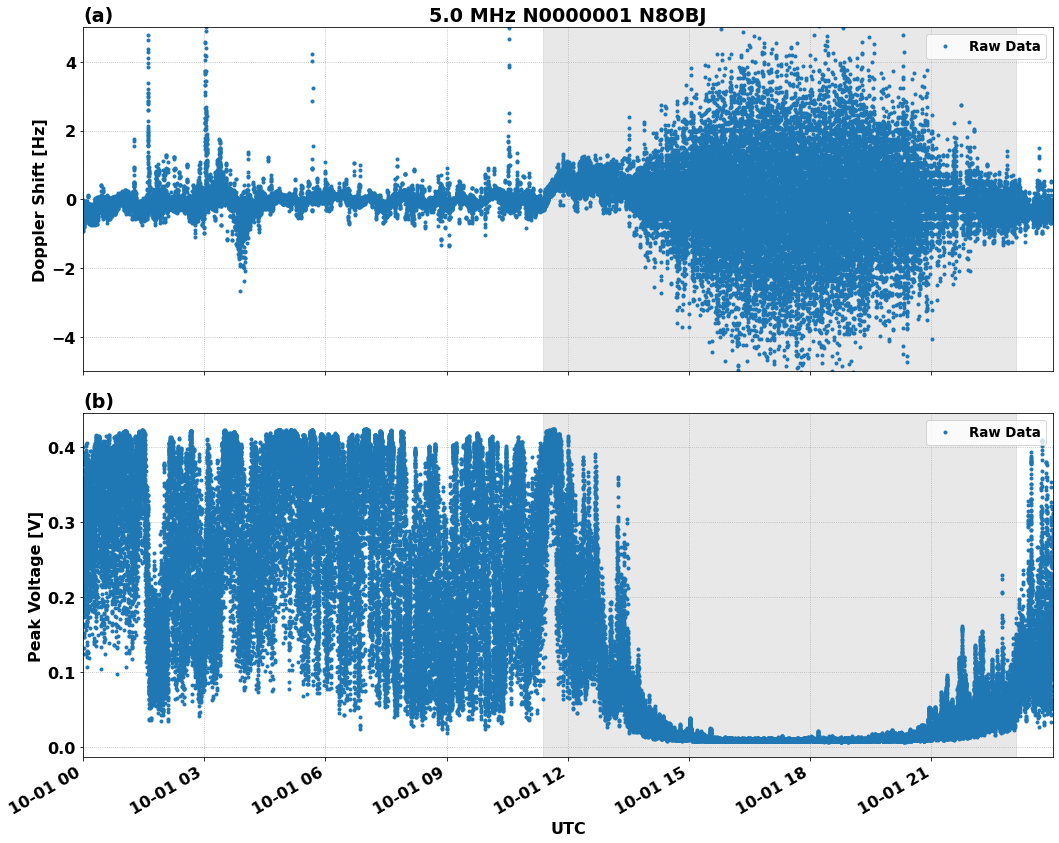

In [13]:
gd.plot_timeSeries(ylims={'Freq':(-5,5)})

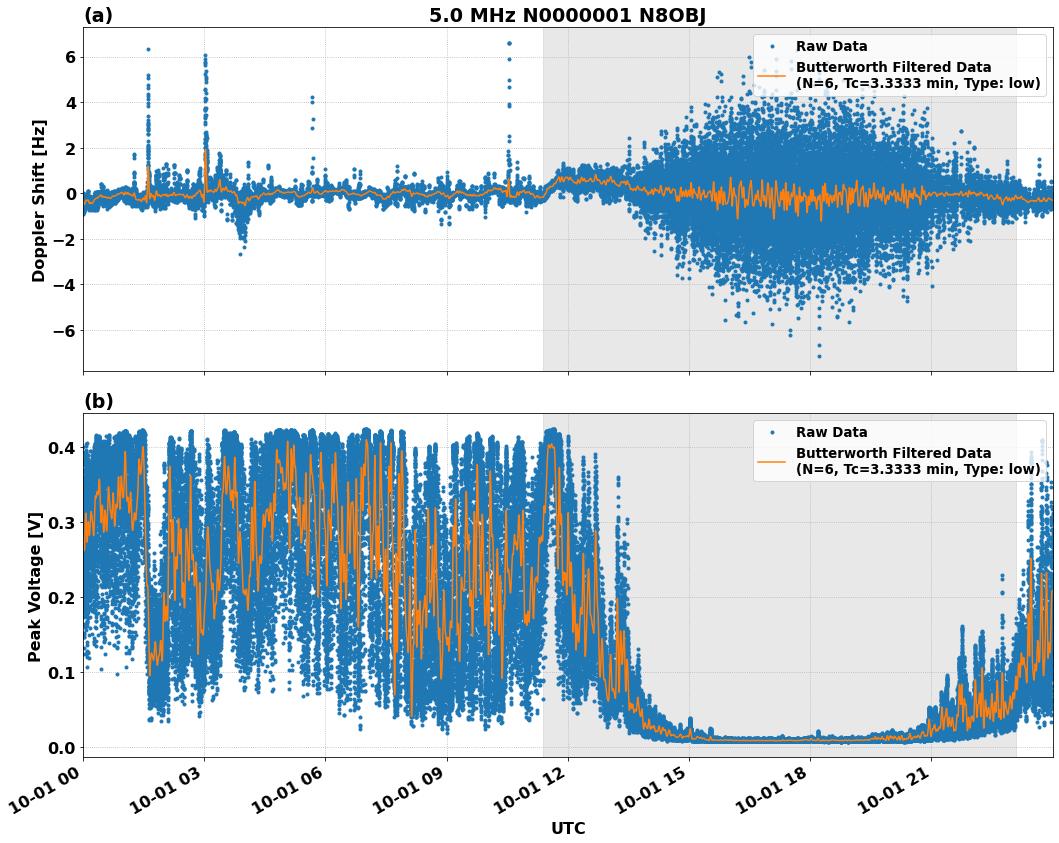

In [16]:
ret = gd.plot_timeSeries(['raw','filtered'])
fig = ret['fig']
fig.savefig('n8obj_20191001.png',bbox_inches='tight')

{'fig': <Figure size 1080x864 with 2 Axes>}

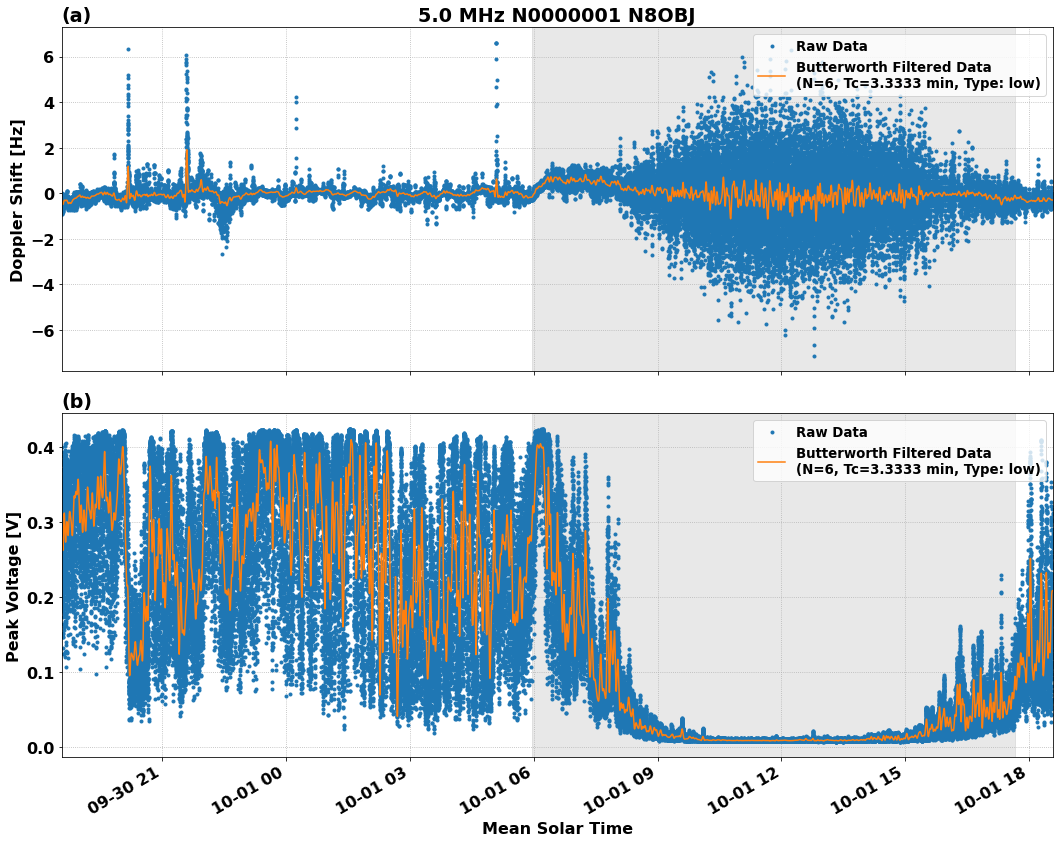

In [15]:
gd.plot_timeSeries(['raw','filtered'],xkey='LMT')